In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Confirmed daily']]
data.columns = ['ds', 'y']

# Modeling

### Model creation

In [4]:
model_args = {
    'seasonality_mode': 'additive', 
    'changepoint_prior_scale': 0.6,
    'weekly_seasonality': 10,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [5]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
future = model.make_future_dataframe(periods = 1)
forecast = model.predict(future)

In [7]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
67,2020-06-12,376.0,400.265744,308.066042,497.095554
68,2020-06-13,440.0,390.954169,298.850104,485.550506
69,2020-06-14,375.0,399.051684,309.843943,499.053650
70,2020-06-15,396.0,387.828708,290.944594,478.822801
71,2020-06-16,407.0,410.517114,316.357472,513.398861
72,2020-06-17,506.0,405.842090,308.581062,503.718222
73,2020-06-18,314.0,388.348903,301.698846,477.639558
74,2020-06-19,352.0,409.855463,314.881501,512.172195
75,2020-06-20,309.0,400.543888,306.400981,495.836515
76,2020-06-21,NaN,408.641403,311.187720,508.034888


### Model explanation

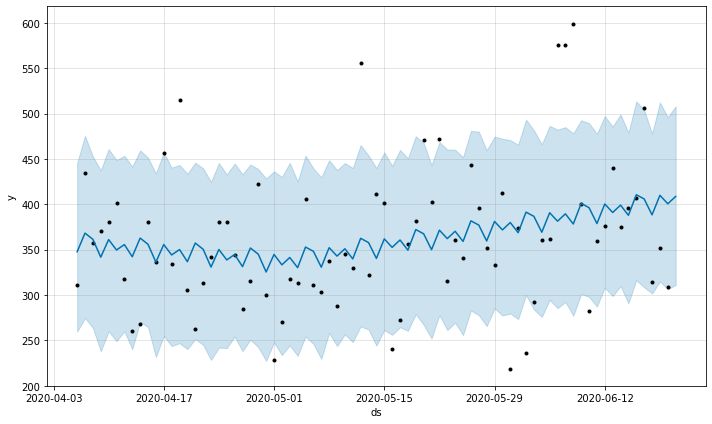

In [8]:
fig = model.plot(forecast)

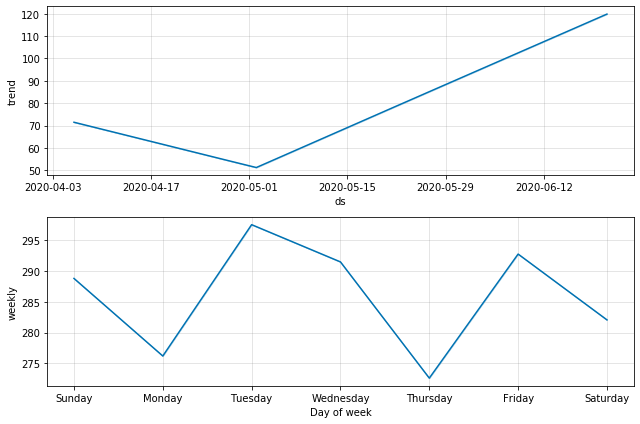

In [9]:
fig = model.plot_components(forecast)

### Model performance

In [10]:
results = cross_validation(model, initial = '69 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 6 forecasts with cutoffs between 2020-06-14 00:00:00 and 2020-06-19 00:00:00


In [11]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-15,398.312066,310.549336,493.974080,396.0,2020-06-14
1,2020-06-16,421.882439,323.448918,511.330197,407.0,2020-06-15
2,2020-06-17,405.725476,307.852461,496.002559,506.0,2020-06-16
3,2020-06-18,420.086704,321.275500,521.763332,314.0,2020-06-17
4,2020-06-19,426.648549,327.440570,532.641756,352.0,2020-06-18
5,2020-06-20,414.919769,319.546601,509.156767,309.0,2020-06-19


In [12]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,6387.934146,79.924553,67.354008,0.188881,0.20512,0.5


### Tomorrow prediction

In [13]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

409